p values from cumulative distribution functions

In [11]:
import numpy as np
np.set_printoptions(precision=4)  # print arrays to 4 decimal places
import matplotlib.pyplot as plt
import scipy.stats

If running in the IPython console, consider running `%matplotlib` to enable
interactive plots.  If running in the Jupyter Notebook, use `%matplotlib
inline`.

Imagine I have a t statistic with 20 degrees of freedom.

[Scipy](https://www.scipy.org/scipylib/index.html) provides a [t distribution class](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.t.html) that we can use to get values
from the t statistic [probability density function](https://en.wikipedia.org/wiki/Probability_density_function) (PDF).

As a start, we plot the PDF for a t statistic with 20 degrees of freedom:

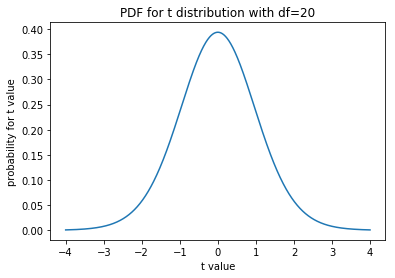

In [12]:
# Make a t distribution object for t with 20 degrees of freedom
t_dist = scipy.stats.t(20)
# Plot the PDF
t_values = np.linspace(-4, 4, 1000)
plt.plot(t_values, t_dist.pdf(t_values))
plt.xlabel('t value')
plt.ylabel('probability for t value')
plt.title('PDF for t distribution with df=20')
plt.show()

The t distribution object `t_dist` can also give us the [cumulative
distribution function](https://en.wikipedia.org/wiki/Cumulative_distribution_function) (CDF).  The CDF gives the area under the curve of the
PDF at and to the left of the given t value:

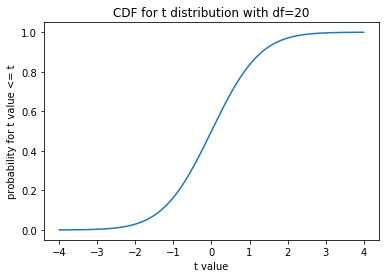

In [13]:
#Plot the CDF
plt.plot(t_values, t_dist.cdf(t_values))
plt.xlabel('t value')
plt.ylabel('probability for t value <= t')
plt.title('CDF for t distribution with df=20')
plt.show()

Say I have a t value $x$ drawn from a t distribution with 20 degrees of
freedom.  The PDF gives the probability for given values of $x$.  Because it
is a probability density, the sum of the probabilities of all possible
values for $x$: $\infty < x < \infty$ must be 1.  Therefore the total area
under the PDF curve is 1, and the maximum value of the CDF is 1.

The CDF gives us the area under the PDF curve at and to the left of a given t
value $x$.  Therefore it is the probability that we will observe a value $x <=
t$ if we sample a value $x$ from a t distribution of (here) 20 degrees of
freedom.

Show relationship of PDF and CDF for three example t values.

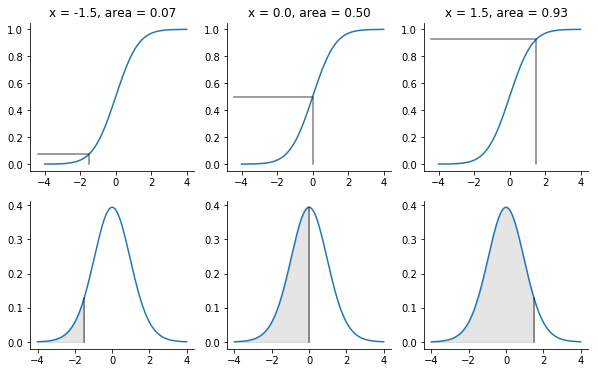

In [14]:
example_values = (-1.5, 0, 1.5)
pdf_values = t_dist.pdf(t_values)
cdf_values = t_dist.cdf(t_values)
fill_color = (0, 0, 0, 0.1)  # Light gray in RGBA format.
line_color = (0, 0, 0, 0.5)  # Medium gray in RGBA format.
fig, axes = plt.subplots(2, len(example_values), figsize=(10, 6))
for i, x in enumerate(example_values):
    cdf_ax, pdf_ax = axes[:, i]
    cdf_ax.plot(t_values, cdf_values)
    pdf_ax.plot(t_values, pdf_values)
    # Fill area at and to the left of x.
    pdf_ax.fill_between(t_values, pdf_values,
                        where=t_values <= x,
                        color=fill_color)
    pd = t_dist.pdf(x)  # Probability density at this value.
    # Line showing position of x on x-axis of PDF plot.
    pdf_ax.plot([x, x],
                [0, pd], color=line_color)
    cd = t_dist.cdf(x)  # Cumulative distribution value for this x.
    # Lines showing x and CDF value on CDF plot.
    x_ax_min = cdf_ax.axis()[0]  # x position of y axis on plot.
    cdf_ax.plot([x, x, x_ax_min],
                [0, cd, cd], color=line_color)
    cdf_ax.set_title('x = {:.1f}, area = {:.2f}'.format(x, cd))
    # Hide top and right axis lines and ticks to reduce clutter.
    for ax in (cdf_ax, pdf_ax):
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        ax.yaxis.set_ticks_position('left')
        ax.xaxis.set_ticks_position('bottom')

plt.show()

For example, say I have drawn a t value $x$ at random from a t distribution
with 20 degrees of freedom.  The probability that $x <= 1.5$ is:

Area of PDF at and to the left of 1.5

In [15]:
t_dist.cdf(1.5)

0.9253821144153737

The total area under the PDF is 1, and the maximum value for the CDF is 1.
Therefore the area of the PDF to the *right* of 1.5 must be:

Area of PDF to the right of 1.5

In [16]:
1 - t_dist.cdf(1.5)

0.07461788558462634


This is the probability that our t value $x$ will be $> 1.5$.  In general,
when we sample a value $x$ at random from a t distribution with $d$ degrees of
freedom, the probability that $x > q$ is given by:

$$
\mathbb{P}(x > q) = 1 - \mathrm{CDF}_d(q)
$$

where $\mathrm{CDF}_d$ is the cumulative distribution function for a t value
with $d$ degrees of freedom.



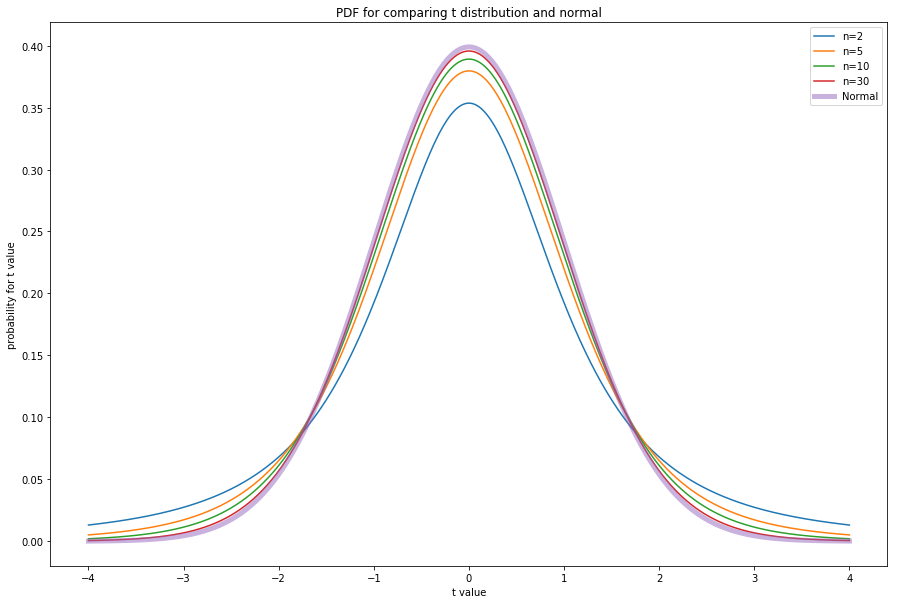

In [17]:
x = np.linspace(-4, 4, 1000)
plt.figure(figsize=(15,10))

nsize = [2, 5, 10, 30]
for n in nsize:
    plt.plot(x, scipy.stats.t(n).pdf(x), label='n={}'.format(n))

plt.plot(x, scipy.stats.norm.pdf(x), lw=5, alpha=0.5, label='Normal' )
plt.xlabel('t value')
plt.ylabel('probability for t value')
plt.title('PDF for comparing t distribution and normal')
plt.legend()
plt.show()